# Studi Case : *Customer Churn*

Perkembangan industri telekomunikasi yang pesat mempengaruhi perilaku masyarakat dalam menggunakan internet untuk berkomunikasi. Sehingga menyebabkan banyaknya perusahaan telekomunikasi dan meningkatnya service provider yang menimbulkan persaingan antar provider. Di sisi lain pengguna memiliki hak dalam memilih provider yang sesuai dan beralih dari provider sebelumnya yang diartikan sebagai **Customer Churn**. Peralihan ini menyebabkan berkurangnya pendapatan perusahaan telekomunikasi sehingga perlu ditangani. Dengan demikian, untuk mengatasi permasalahan tersebut dibuat sistem yang **melakukan prediksi costumer churn** agar dapat memetakan strategi bisnis untuk mempertahankan pelanggan.

## Data Overview (Rangkuman Data)

In [ ]:
#import library
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

%matplotlib inline


warnings.filterwarnings('ignore')

In [ ]:
#Dataset untuk train dan test
url1 = "https://archive.org/download/data-train_202403/Data%20Train.csv"
dataset = pd.read_csv(url1)

In [ ]:
#Data untuk validasi
url2 = "https://archive.org/download/data-train_202403/Data%20Test.csv"
validation = pd.read_csv(url2)

In [ ]:
dataset.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
validation.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
dataset.shape

(4250, 20)

In [ ]:
validation.shape

(750, 20)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
dataset.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
dataset.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
validation.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

Data Overview atau rangkuman data menjadi proses untuk memberikan pemahaman awal dari data yang akan diolah, mulai dari struktur data, berapa banyak record, berapa banyak kolom, jenis tipe data pada kolom, jumlah nilai null dan sebagainya. Pada studi kasus ini, proses rangkuman data dilakukan pada data train dan test serta data validation sebagai bahan uji.

## Exploratory Data Analysis (EDA)

### Bar Chart (Diagram Batang)

In [ ]:
#Barchart
def bar_chart(column, title=None, xlabel=None, ylabel=None):
    count = dataset[column].value_counts()
    index = count.index
    value = count.values

    fig = plt.figure(figsize=(7, 5))
    plt.bar(index, value, color="orange", width=0.5)

    for i, v in enumerate(value):
        plt.text(i, v, str(v), ha='center', va='bottom')

    if title:
      plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)

    plt.show()

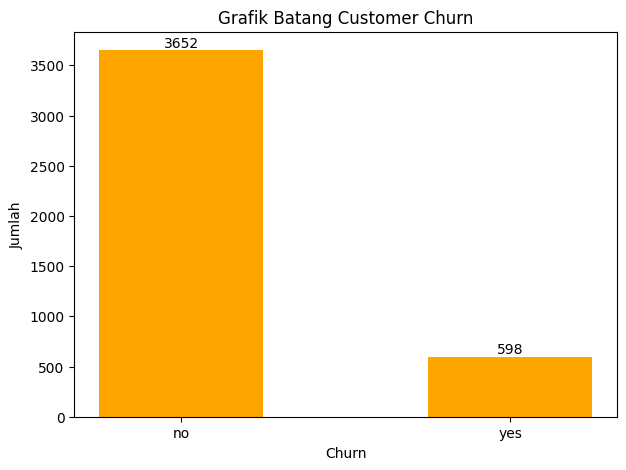

In [ ]:
bar_chart('churn', 'Grafik Batang Customer Churn', 'Churn', 'Jumlah')

Pada grafik batang customer churn mempresentasikan dari 4250 record data yang mewakili jumlah pelanggan menggambarkan bahwa terdapat 3652 pelanggan tidak dalam kategori churn (masih berlangganan) dan 598 pelanggan dalam kategori churn (berhenti berlangganan).

### Pie Chart (Diagram Pie)

In [ ]:
import matplotlib.pyplot as plt

def pie_chart(column, title=None):
    converted_data = dataset[column].map({'no': 'no', 'yes': 'yes'})
    count = converted_data.value_counts()
    index = count.index
    value = count.values

    fig = plt.figure(figsize=(7, 7))
    plt.pie(value, labels=index, autopct='%1.1f%%', colors=['orange','dodgerblue'])

    if title:
        plt.title(title)

    plt.legend(index)
    plt.show()

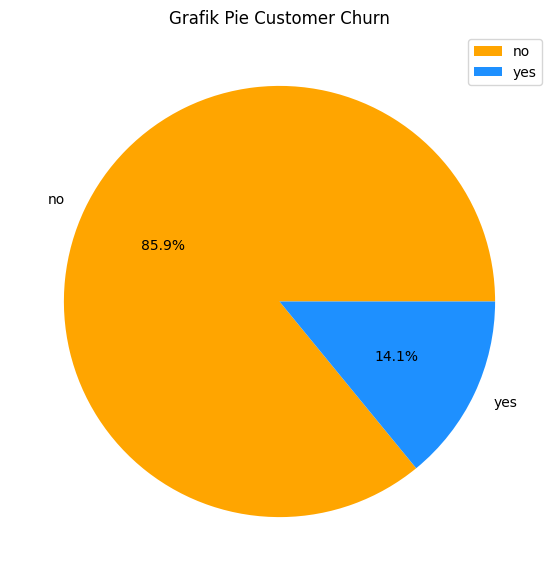

In [ ]:
pie_chart('churn', 'Grafik Pie Customer Churn')

Dengan demikian, bila digambar dalam bentuk diagram pie persentase pelanggan tidak dalam kategori churn sebesar 85.9% sedangkan pelanggan dalam ketegori churn sebesar 14.1%. Pada data ini sebagian besar pengguna cenderung menggunakan layanan sedangkan sebagian kecil beralih ke penyedia layanan lain.

### Heatmap untuk Korelasi Variabel

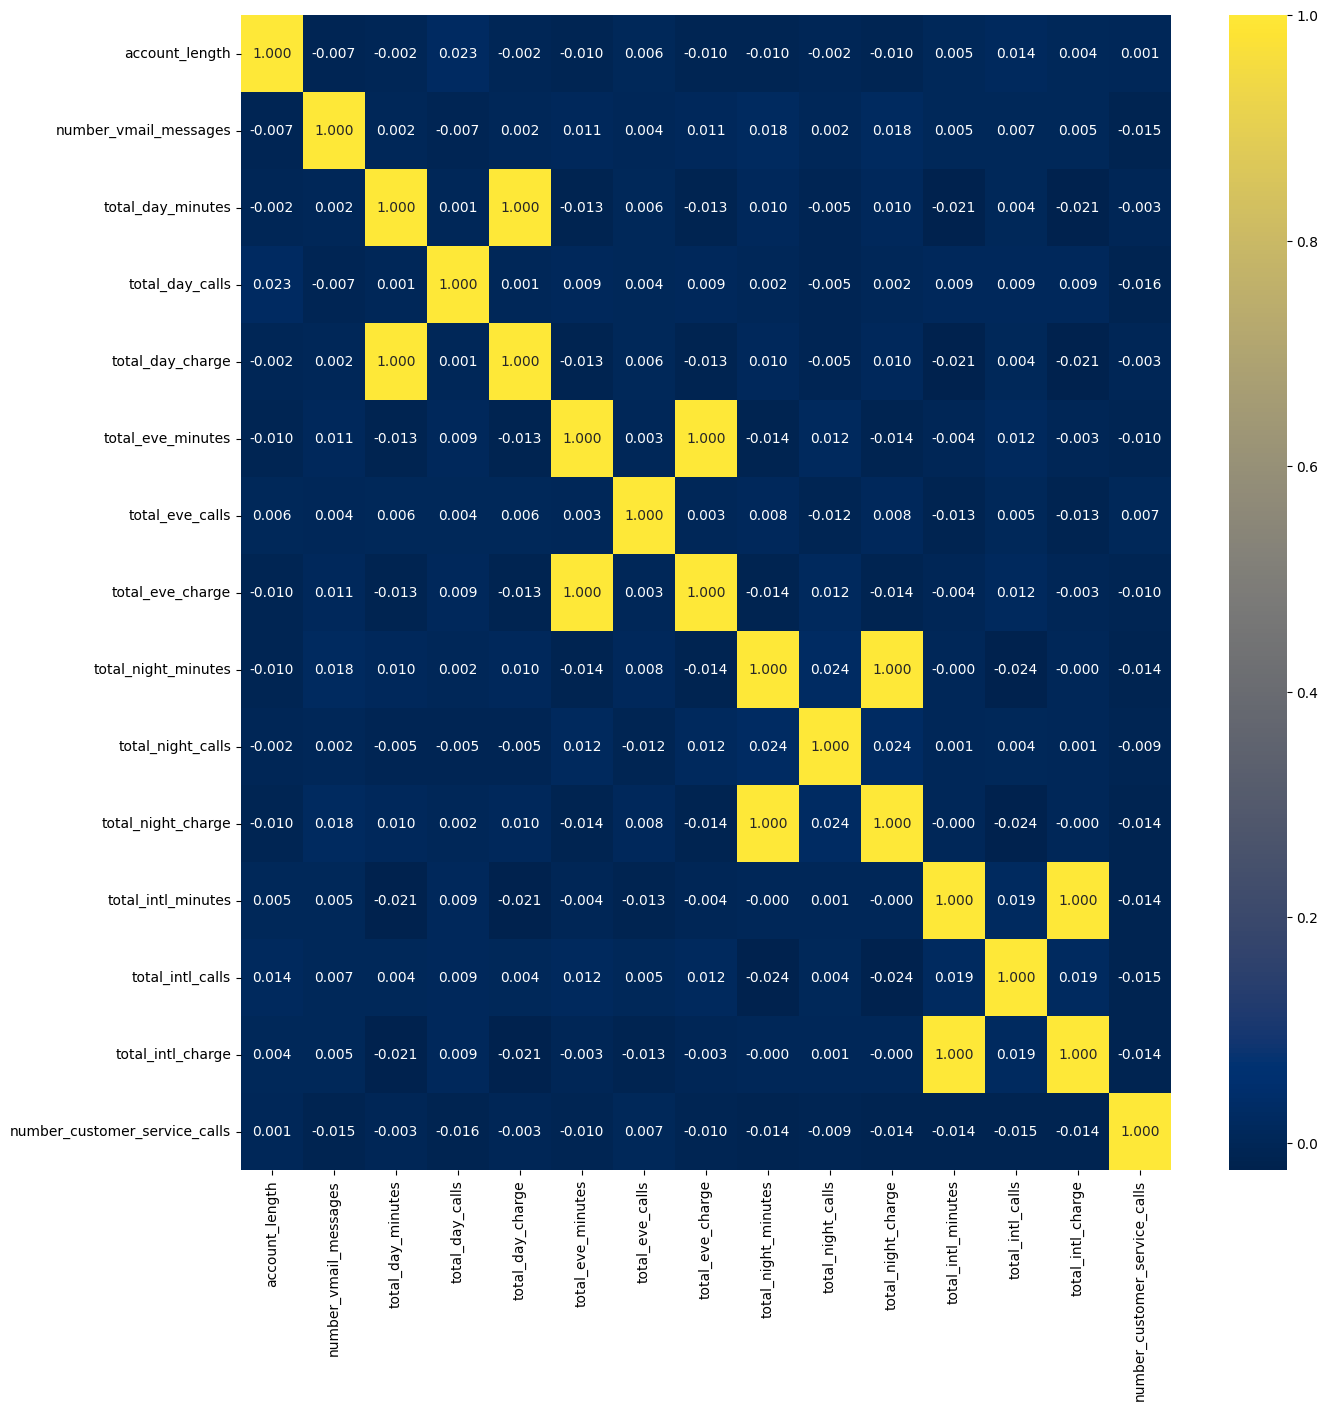

In [ ]:
corrMatrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True, fmt=".3f", cmap="cividis")
plt.show()

Pada heatmap dapat diperhatikan bahwa beberapa variabel terlalu berkorelasi. Diantaranya total_day_minutes dengan total_day_charge, total_night_minutes dengan total_night_charge dan total_intl_minutes dengan total_intl_charge. Hasil ini dapat terjadi karena dependen variabel, sehingga tidak perlu untuk digunakan.

### Histogram untuk Melihat Distribusi Data

In [ ]:
#histogram
def histogram(column, title=None, xlabel=None, ylabel=None):
  fig, ax = plt.subplots(figsize=(5,3))
  ax.hist(dataset[column], color='darkcyan')

  if title:
    ax.set_title(title)
  if title:
    ax.set_xlabel(xlabel)
  if title:
    ax.set_ylabel(ylabel)
  plt.show()

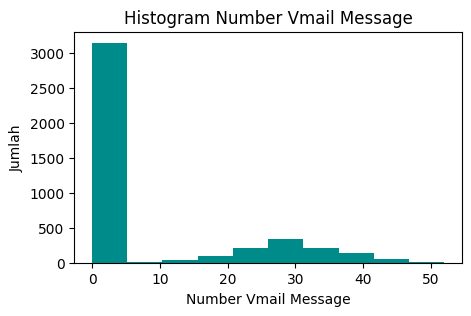

In [ ]:
histogram('number_vmail_messages', 'Histogram Number Vmail Message', 'Number Vmail Message', 'Jumlah')

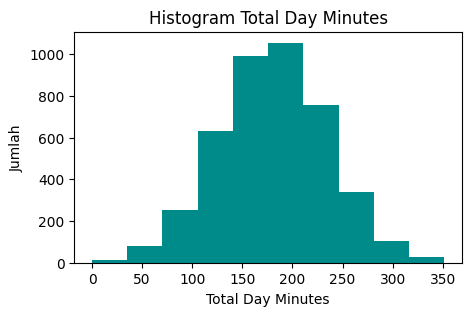

In [ ]:
histogram('total_day_minutes', 'Histogram Total Day Minutes', 'Total Day Minutes', 'Jumlah')

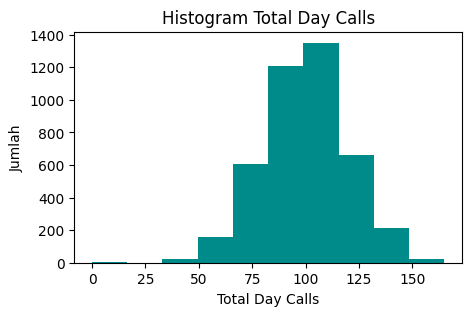

In [ ]:
histogram('total_day_calls', 'Histogram Total Day Calls', 'Total Day Calls', 'Jumlah')

Pada histogram menampilkan beberapa variabel dengan distribusi datanya. Terdapat beberapa variabel (kolom) yang persebaran datanya tidak merata. Sehingga nantinya diperlukan untuk proses agar data dapat terdistribusi dengan baik.

## Preprocessing (Pemrosesan Awal)

In [ ]:
dataset.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
validation.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

Setelah dilakukan pengecekan nilai null pada dataset, tidak terdapat nilai dan anomali. Sehingga dapat dilakukan ke proses selanjutnya.

### Konversi data kategorical menjadi numerical

In [ ]:
dataset['churn'] = dataset['churn'].map({'yes': 1, 'no': 0})

In [ ]:
dataset

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [ ]:
dataset['international_plan'] = dataset['international_plan'].map({'yes': 1, 'no': 0})

In [ ]:
dataset

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,WV,73,area_code_408,0,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,NC,75,area_code_408,0,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,HI,50,area_code_408,0,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [ ]:
dataset['voice_mail_plan'] = dataset['voice_mail_plan'].map({'yes': 1, 'no': 0})

In [ ]:
dataset

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,WV,73,area_code_408,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,NC,75,area_code_408,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,HI,50,area_code_408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


In [ ]:
dataset = dataset.drop(['number_vmail_messages','account_length','state', 'area_code', 'total_day_minutes', 'total_eve_minutes','total_night_minutes', 'total_intl_charge'], axis =1)
dataset

,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,0,1,123,27.47,103,16.62,103,11.45,13.7,3,1,0
1,0,0,114,41.38,110,10.30,104,7.32,12.2,5,0,0
2,1,0,71,50.90,88,5.26,89,8.86,6.6,7,2,0
3,1,0,113,28.34,122,12.61,121,8.41,10.1,3,3,0
4,0,1,88,37.09,108,29.62,118,9.57,7.5,7,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0,0,70,32.01,88,20.72,79,9.62,10.3,6,0,0
4246,0,0,89,30.24,82,11.15,89,8.38,11.5,6,3,0
4247,0,0,101,29.02,126,16.41,104,5.81,6.9,7,1,0
4248,0,1,127,40.07,126,18.96,116,13.39,9.9,5,2,0


Konversi data kategorik ke data numerik diperlukan agar karena sebagian besar algoritma pembelajaran mesin dan statistik memerlukan data yang dalam bentuk numerik untuk dapat dijalankan dengan baik. Pada studi kasus ini, konversi dilakukan baik pada dataset sebagai train dan test, maupun pada data validation sebagai bahan prediksi.
Selain itu juga dilakukan proses drop column untuk memilah variabel yang akan digunakan maupun tidak. Proses ini dilakukan pada dataset dan data validation.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   international_plan             4250 non-null   int64  
 1   voice_mail_plan                4250 non-null   int64  
 2   total_day_calls                4250 non-null   int64  
 3   total_day_charge               4250 non-null   float64
 4   total_eve_calls                4250 non-null   int64  
 5   total_eve_charge               4250 non-null   float64
 6   total_night_calls              4250 non-null   int64  
 7   total_night_charge             4250 non-null   float64
 8   total_intl_minutes             4250 non-null   float64
 9   total_intl_calls               4250 non-null   int64  
 10  number_customer_service_calls  4250 non-null   int64  
 11  churn                          4250 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 398.6 KB


In [ ]:
validation['international_plan'] = validation['international_plan'].map({'yes': 1, 'no': 0})
validation['voice_mail_plan'] = validation['voice_mail_plan'].map({'yes': 1, 'no': 0})

In [ ]:
validation

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
validation = validation.drop(['id','number_vmail_messages','account_length','state', 'area_code', 'total_day_minutes', 'total_eve_minutes','total_night_minutes', 'total_intl_charge'], axis =1)
validation

,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,0,1,110,45.07,99,16.78,91,11.01,10.0,3,1
1,1,0,98,37.98,101,18.75,118,9.18,6.3,6,0
2,0,0,70,20.52,76,26.11,99,9.14,13.1,6,4
3,0,0,114,32.42,111,18.55,121,5.83,8.1,3,3
4,0,0,76,21.13,112,23.55,115,11.28,15.5,5,3
...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,99,20.30,97,19.24,111,9.12,11.3,7,0
746,0,0,118,30.12,84,22.99,112,10.88,12.3,2,3
747,0,0,90,31.31,73,21.83,113,9.61,14.7,2,3
748,0,0,89,23.90,128,14.69,97,9.56,13.6,4,1


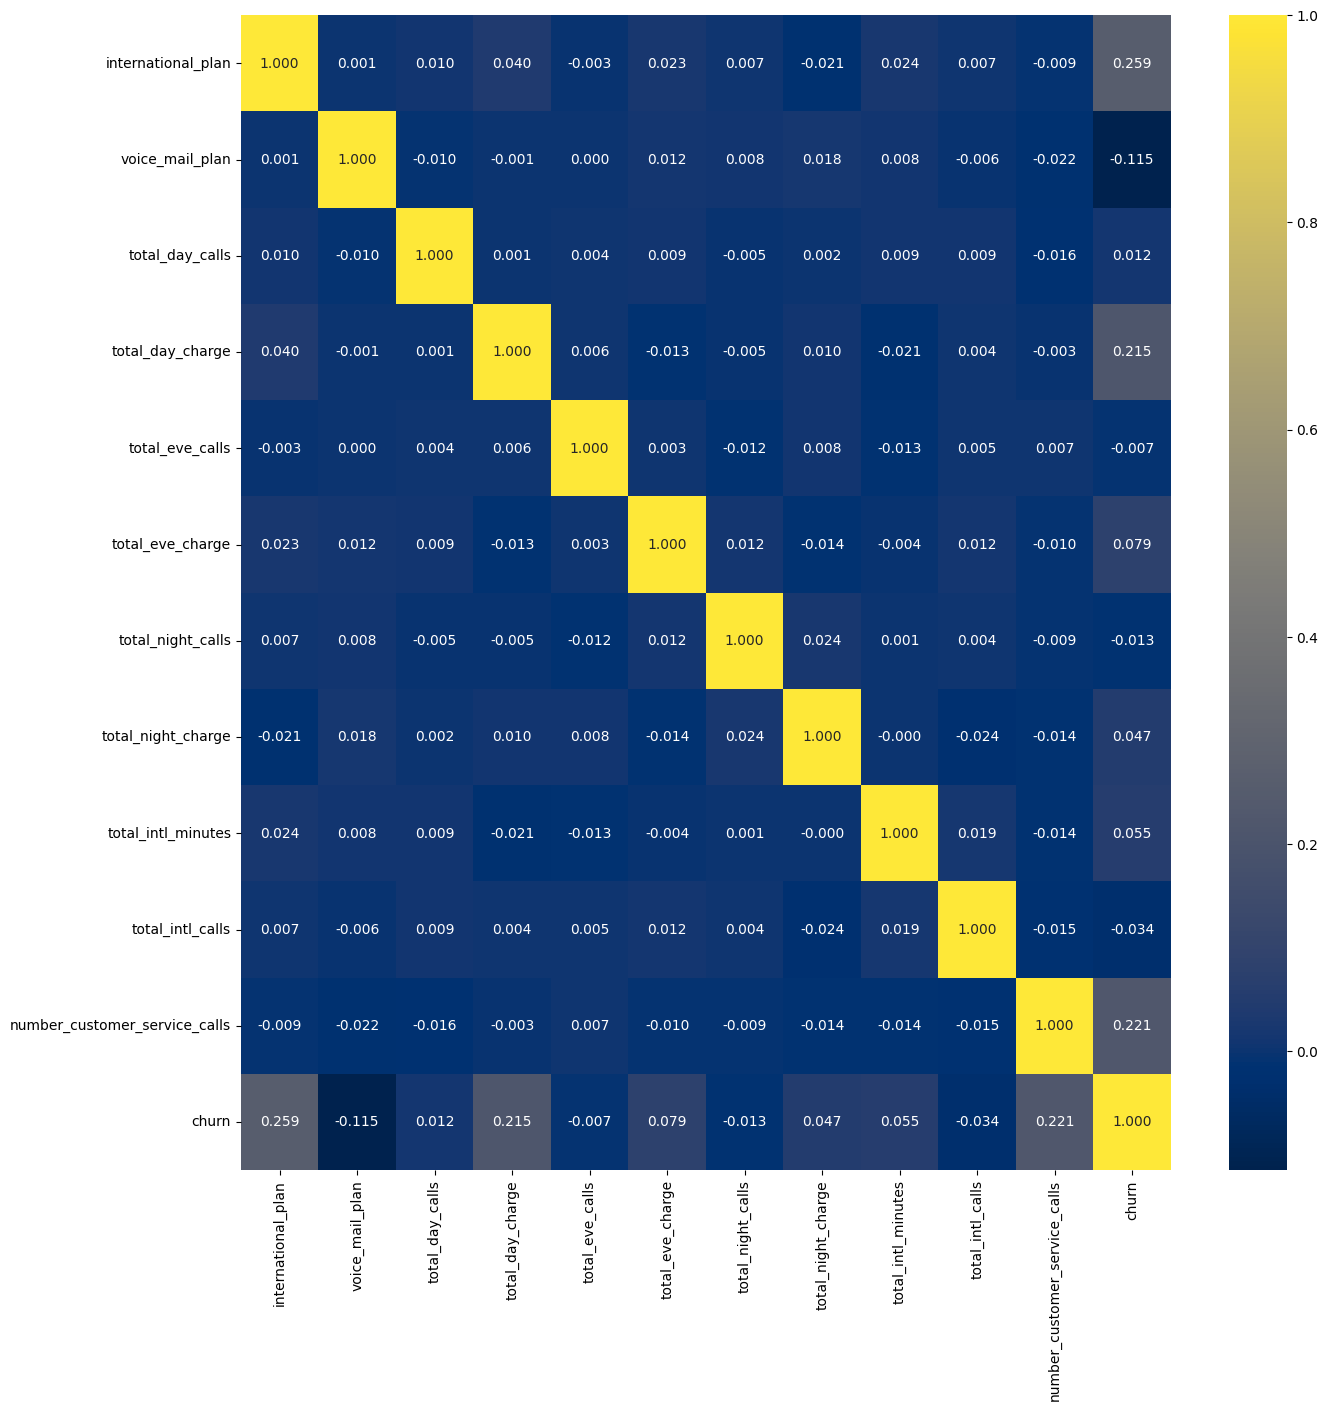

In [ ]:
corrMatrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True, fmt=".3f", cmap="cividis")
plt.show()

Dari heatmap tersebut dapat dilihat bahwa variabel yang digunakan sebagai fitur merupakan variabel independen dan sudah menghilangkan variabel yang dependen.

In [ ]:
from scipy import stats
import numpy as np

print(f'Jumlah baris sebelum memfilter outlier: {len(dataset)}')

filtered_entries = np.array([True] * len(dataset))
for col in ['international_plan', 'voice_mail_plan', 'total_day_calls',
            'total_day_charge', 'total_eve_calls', 'total_eve_charge', 'total_night_calls',
            'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'number_customer_service_calls']:
    zscore = abs(stats.zscore(dataset[col]))
    filtered_entries = (zscore < 3) & filtered_entries

dataset_outlier = dataset[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(dataset_outlier)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3671


In [ ]:
dataset_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3671 entries, 0 to 4248
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   international_plan             3671 non-null   int64  
 1   voice_mail_plan                3671 non-null   int64  
 2   total_day_calls                3671 non-null   int64  
 3   total_day_charge               3671 non-null   float64
 4   total_eve_calls                3671 non-null   int64  
 5   total_eve_charge               3671 non-null   float64
 6   total_night_calls              3671 non-null   int64  
 7   total_night_charge             3671 non-null   float64
 8   total_intl_minutes             3671 non-null   float64
 9   total_intl_calls               3671 non-null   int64  
 10  number_customer_service_calls  3671 non-null   int64  
 11  churn                          3671 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 372.8 KB


Untuk menghilangkan outlier, kami menggunakan z-score yang digunakan untuk menormalisasi data dan mengidentifikasi outlier. Sehingga terlihat bahwa jumlah baris data sebelum dan sesudah dilakukan normalisasi. Jumlah sebelum yaitu 4250 baris data dan sesudah yaitu 3671 baris data.

In [ ]:
X = dataset_outlier.drop(['churn'], axis=1)
y = dataset_outlier['churn']

## Modeling (Pembuatan Model)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

Dataset akan terbagi dengan rasio 0.7 sebagai data train dan 0.3 sebagai data test. Dimana data tersebut akan dilakukan proses train dan test dengan 3 model yaitu KNN, Decision Tree dan Random Forest. Masing-masing model dilakukan hyperparameter tunning dengan metode GridSearchCV.

#### Algoritma KNN

In [97]:
param_grid = {'n_neighbors':[1,3,5,7,9,11,13]}

In [98]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print("\nAkurasi Model:", accuracy_knn)
print("Akurasi Model: {:.2%}".format(accuracy_knn))

Parameter terbaik: {'n_neighbors': 9}

Akurasi Model: 0.8947368421052632
Akurasi Model: 89.47%


#### Algoritma Decision Tree

In [81]:
param_grid = {
    'criterion':['gini', 'entropy'],
    'splitter':['best','random'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [82]:
from sklearn.tree import DecisionTreeClassifier

dcs_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(dcs_tree, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)

best_dcs_tree = grid_search.best_estimator_

y_pred = best_dcs_tree.predict(X_test)
accuracy_dcs = accuracy_score(y_test, y_pred)

print("\nAkurasi Model:", accuracy_dcs)
print("Akurasi Model: {:.2%}".format(accuracy_dcs))

Parameter terbaik: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}

Akurasi Model: 0.9455535390199638
Akurasi Model: 94.56%


#### Algoritma Random Forest

In [83]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [84]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Akurasi Model:", accuracy_rf)
print("Akurasi Model: {:.2%}".format(accuracy_rf))

Parameter terbaik: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Akurasi Model: 0.9455535390199638
Akurasi Model: 94.56%


Dengan menggunakan parameter terbaik dari masing-masing model, maka didapatkan performa sebagai berikut.


| no | algoritma | akurasi |
|----|-----------|---------|
| 1  | KNN       | 89.47%    |
| 2  | Decision Tree       | 94.56%    |
| 3  | Random Forest       | 94.56%     |

## Model Prediction (Prediksi Model)

In [99]:
#prediksi knn
knn_predik = best_knn.predict(validation)
print(knn_predik)
counts = np.bincount(knn_predik)
print("\nJumlah pelanggan tidak churn (0):", counts[0])
print("Jumlah pelanggan churn (1)", counts[1])
print()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [86]:
#prediksi decision tree
dcs_tree_predik = best_dcs_tree.predict(validation)
print(dcs_tree_predik)
counts = np.bincount(dcs_tree_predik)
print("\nJumlah pelanggan tidak churn (0):", counts[0])
print("Jumlah pelanggan churn (1)", counts[1])

[0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [87]:
#prediksi random forest
rf_predik = best_rf.predict(validation)
print(rf_predik)
counts = np.bincount(rf_predik)
print("\nJumlah pelanggan tidak churn (0):", counts[0])
print("Jumlah pelanggan churn (1)", counts[1])

[0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 

Model yang terlatih akan diuji dengan data validation, yakni data di luar data train dan test. Hasilnya dapat dilihat pada tabel berikut.

| no | algoritma | prediksi (no) | prediksi (yes) |
|----|-----------|---------------|----------------|
| 1  | KNN               | 743  | 7            |
| 2  | Decision Tree     | 681   | 69            |
| 3  | Random Forest     | 690  | 60           |